In [1]:
# Libraries
import pandas as pd 
import numpy as np 
from dotenv import load_dotenv
import os
from binance.client import Client
import matplotlib.pyplot as plt

In [2]:
#Get API keys
load_dotenv()

api_key = os.getenv('BINANCE_API_KEY')
api_secret = os.getenv('BINANCE_API_SECRET')

In [3]:
# Extracting data 

client = Client(api_key, api_secret)

# Bitcoin Data
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_5MINUTE
start_time = "30 days ago UTC" 

# Historical data
klines = client.get_historical_klines(symbol, interval, start_time)

# To DataFrame
df = pd.DataFrame(klines, columns=["date", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"])
df['date'] = pd.to_datetime(df['date'], unit='ms')

# Only OHLCV
df = df[['date', 'open', 'high', 'low', 'close', 'volume']]

In [4]:
# Few analysis

#dtypes
print(df.dtypes)

#Describe
print(df.describe)

#head
df.head(10)

date      datetime64[ns]
open              object
high              object
low               object
close             object
volume            object
dtype: object
<bound method NDFrame.describe of                     date            open            high             low  \
0    2024-10-27 16:00:00  67792.00000000  67855.67000000  67780.00000000   
1    2024-10-27 16:05:00  67824.01000000  67840.00000000  67792.00000000   
2    2024-10-27 16:10:00  67839.99000000  67848.00000000  67804.00000000   
3    2024-10-27 16:15:00  67841.48000000  67878.79000000  67766.10000000   
4    2024-10-27 16:20:00  67786.97000000  67786.98000000  67720.00000000   
...                  ...             ...             ...             ...   
8635 2024-11-26 15:35:00  92920.00000000  93417.75000000  92912.02000000   
8636 2024-11-26 15:40:00  93390.61000000  93412.70000000  93168.01000000   
8637 2024-11-26 15:45:00  93336.00000000  93417.89000000  93217.31000000   
8638 2024-11-26 15:50:00  93321.13000000  

,date,open,high,low,close,volume
0,2024-10-27 16:00:00,67792.00000000,67855.67000000,67780.00000000,67824.01000000,69.12547000
1,2024-10-27 16:05:00,67824.01000000,67840.00000000,67792.00000000,67839.99000000,32.89505000
2,2024-10-27 16:10:00,67839.99000000,67848.00000000,67804.00000000,67841.48000000,25.23589000
3,2024-10-27 16:15:00,67841.48000000,67878.79000000,67766.10000000,67786.97000000,42.64441000
4,2024-10-27 16:20:00,67786.97000000,67786.98000000,67720.00000000,67730.00000000,36.57767000
5,2024-10-27 16:25:00,67730.00000000,67758.71000000,67668.77000000,67689.99000000,45.15287000
6,2024-10-27 16:30:00,67689.99000000,67716.72000000,67669.44000000,67698.00000000,32.07942000
7,2024-10-27 16:35:00,67697.99000000,67698.00000000,67662.00000000,67668.33000000,27.91702000
8,2024-10-27 16:40:00,67668.33000000,67739.83000000,67668.33000000,67739.82000000,35.60064000
9,2024-10-27 16:45:00,67739.82000000,67800.00000000,67736.05000000,67774.64000000,30.17547000


In [5]:
# Change object type to float
columns_to_convert = ['open', 'high', 'low', 'close', 'volume']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [6]:
#Volume round to 2f
df["volume"] = df['volume'].round(2)
df

,date,open,high,low,close,volume
0,2024-10-27 16:00:00,67792.00,67855.67,67780.00,67824.01,69.13
1,2024-10-27 16:05:00,67824.01,67840.00,67792.00,67839.99,32.90
2,2024-10-27 16:10:00,67839.99,67848.00,67804.00,67841.48,25.24
3,2024-10-27 16:15:00,67841.48,67878.79,67766.10,67786.97,42.64
4,2024-10-27 16:20:00,67786.97,67786.98,67720.00,67730.00,36.58
...,...,...,...,...,...,...
8635,2024-11-26 15:35:00,92920.00,93417.75,92912.02,93390.61,235.23
8636,2024-11-26 15:40:00,93390.61,93412.70,93168.01,93336.00,170.08
8637,2024-11-26 15:45:00,93336.00,93417.89,93217.31,93321.12,195.53
8638,2024-11-26 15:50:00,93321.13,93382.51,93080.03,93148.01,201.76


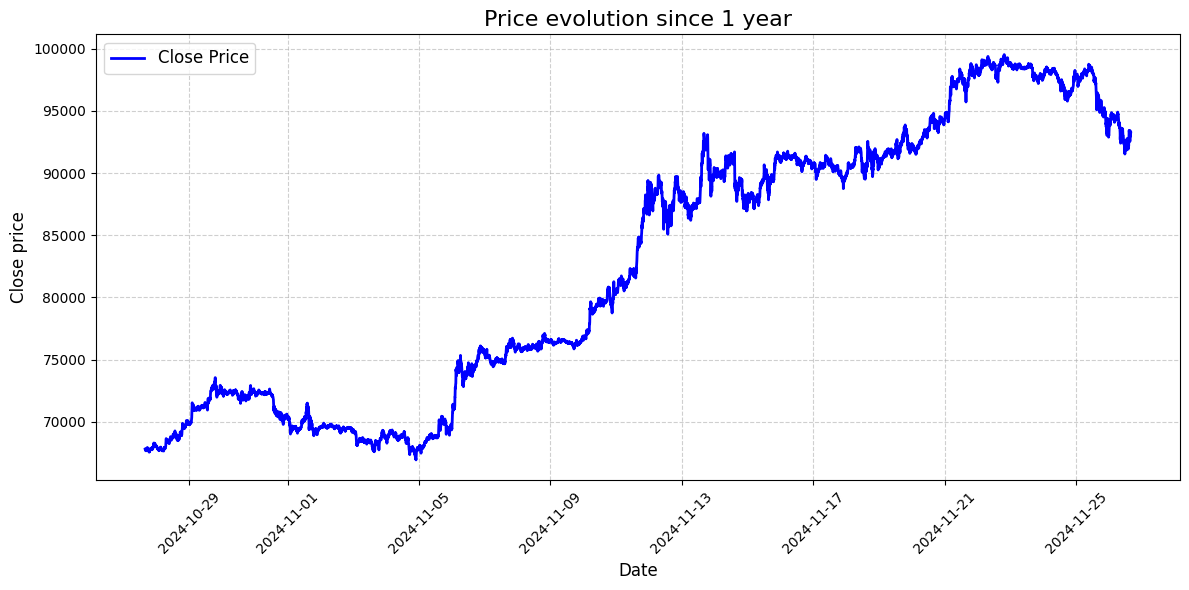

In [7]:
#Price evolution
plt.figure(figsize=(12, 6))
plt.plot(df['date'],df['close'], label='Close Price', color='blue', linewidth=2)


plt.title('Price evolution since 1 year', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=12)

#Grid
plt.grid(visible=True, linestyle='--', alpha=0.6)


plt.tight_layout() 
plt.show()

In [8]:
#To CSV

df.to_csv(r"C:\Users\Proab\OneDrive\Bureau\Dev projects\crypto-trading-strategy-1\data\BTC_USDT_data.csv", index=False)